In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [44]:
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(columns_to_drop, axis=1, inplace=True)

In [45]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
new_names = {
    'v1': 'category',
    'v2': 'messages'
}

df.rename(columns=new_names, inplace=True)
df.head()

,category,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<function matplotlib.pyplot.show(close=None, block=None)>

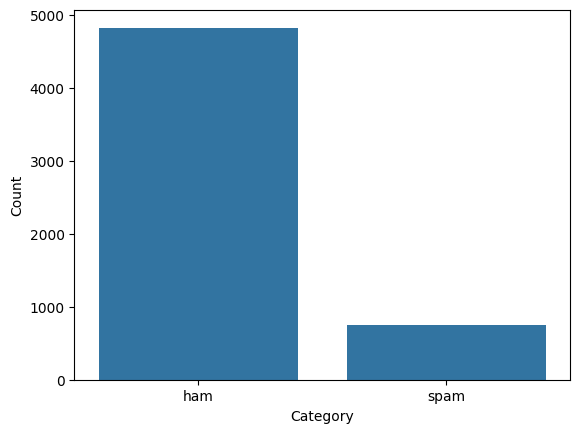

In [47]:
sns.countplot(x='category', data=df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

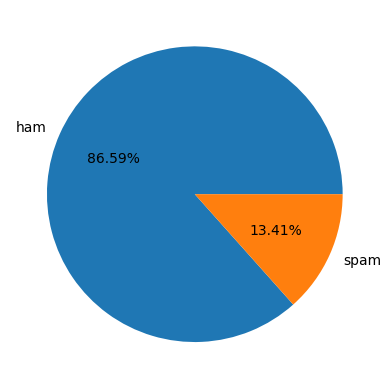

In [48]:
plt.pie(df['category'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f%%')
plt.show

In [49]:
df.loc[df['category'] == 'spam', 'category'] = 1
df.loc[df['category'] == 'ham', 'category'] = 0
df.head()

,category,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
x = df['messages']
y = df['category']

In [51]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: messages, Length: 5572, dtype: object


In [52]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: category, Length: 5572, dtype: object


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [56]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer #converts text documents into numerical features
vectorizer = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
x_train_features = vectorizer.fit_transform(x_train)
x_test_features = vectorizer.transform(x_test)

In [63]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [62]:
print(x_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

In [65]:
print(y_train)

3075    0
1787    0
1614    0
4304    0
3266    0
       ..
789     0
968     0
1667    0
3321    0
1688    0
Name: category, Length: 4457, dtype: int64


In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [67]:
model.fit(x_train_features, y_train)

LogisticRegression()

In [68]:
pr = model.predict(x_test_features)

In [73]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pr)
print(accuracy)


0.9623318385650225


In [76]:
new_mail = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
new_mail_features = vectorizer.transform(new_mail)
pr1 = model.predict(new_mail_features)

if pr1[0] == 1:
    print("Spam")
else:
    print("Ham")

Spam


In [77]:
# Function to get user input for the new email
def get_new_mail():
  """Prompts the user to enter a new email and returns it as a list."""
  new_mail = input("Enter a new email to classify (Spam or Ham): ")
  return [new_mail]

# Get the new email from the user
new_mail = get_new_mail()

# Transform the new email using the vectorizer
new_mail_features = vectorizer.transform(new_mail)

# Predict the class (spam or ham) using the model
pr1 = model.predict(new_mail_features)

# Print the classification result
if pr1[0] == 1:
  print("Spam")
else:
  print("Ham")


Enter a new email to classify (Spam or Ham): Ok lar... Joking wif u oni...
Ham
